### Regression Model Evaluation Metrics

- For Detailed Explanation [Click Here](https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/)


- To Read More [Click Here](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.shape, df.head()

((200, 2),
    cgpa  package
 0  6.89     3.26
 1  5.12     1.98
 2  7.82     3.25
 3  7.42     3.67
 4  6.94     3.57)

Text(0, 0.5, 'Package(in lpa)')

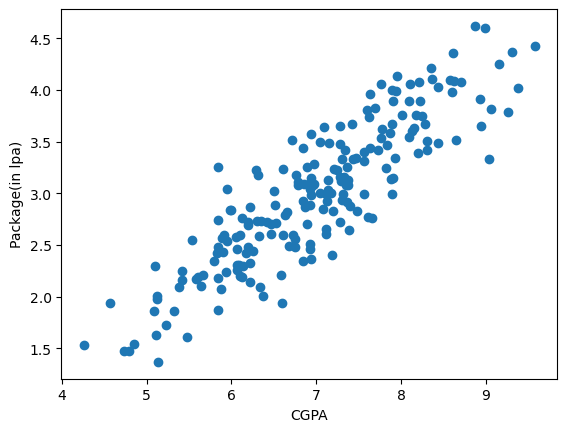

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


Text(0, 0.5, 'Package(in lpa)')

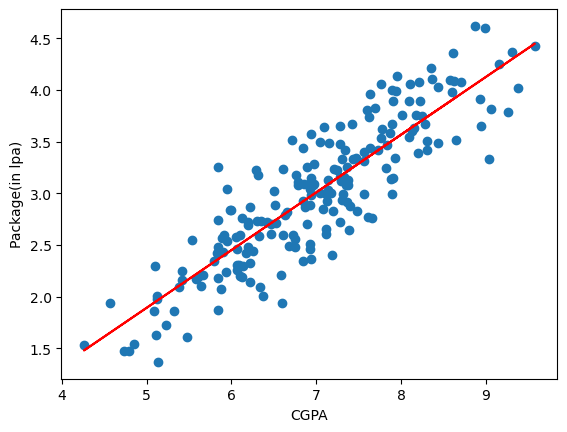

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [13]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [14]:
y_pred = lr.predict(X_test)

In [15]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [16]:
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  0.2884710931878175


In [17]:
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  0.12129235313495527


In [18]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  0.34827051717731616


In [19]:
print("r2 score: ",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

r2 score:  0.780730147510384


In [20]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [21]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [22]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.534919,3.26
1,5.12,0.769583,1.98
2,7.82,0.491039,3.25
3,7.42,0.510516,3.67
4,6.94,0.101832,3.57


Text(0, 0.5, 'Package(in lpa)')

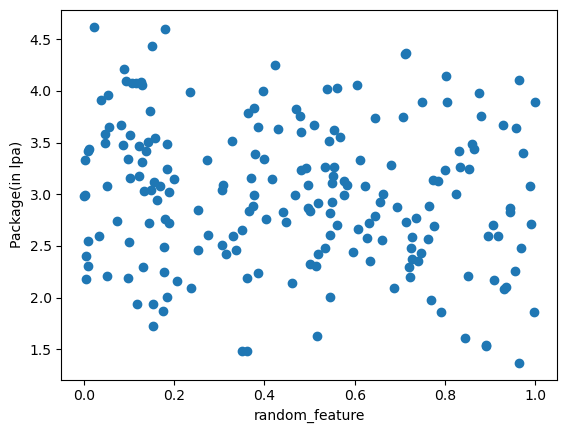

In [23]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [24]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7845110056777287


In [30]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7728629519305789

In [31]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [32]:
new_df2.sample(5)

,cgpa,iq,package
119,7.39,3.35,2.65
140,7.91,3.35,3.15
45,7.87,3.68,3.58
5,7.89,3.09,2.99
121,6.50,3.32,3.02


Text(0, 0.5, 'Package(in lpa)')

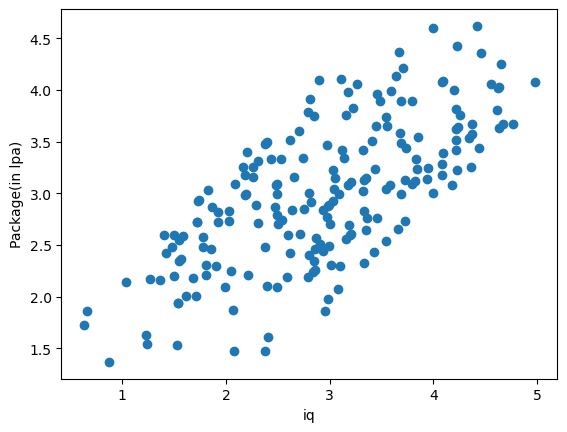

In [33]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [34]:
np.random.randint(-100,100)

-73

In [35]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [38]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8292043407460983


In [39]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.81997214294859